# **Non-Idealities Fitting Model**

In [51]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [52]:
data = pd.read_csv('data.csv')
data.head()

,Model #,NWA,SRCV,NLCV,ACV
0,0,0.065975,0.000678,0.004777,0.188207
1,1,0.022608,0.000487,0.003521,0.002008
2,2,0.068977,0.000721,0.004432,0.301947
3,3,0.035396,0.000537,0.003860,0.171614
4,4,0.065797,0.000673,0.004295,0.179593


In [53]:
#conduct feature scaling before PCA
pipe = make_pipeline(StandardScaler(), PCA(n_components=2))

pca_data = pipe.fit_transform(data.loc[:, 'SRCV':'ACV'])
plot_data = np.concatenate([pca_data, np.array(data.loc[:, 'NWA']).reshape(-1,1)], axis=1)

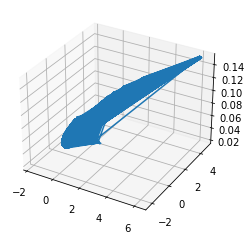

In [54]:
ax = plt.figure().add_subplot(projection='3d')
plt.plot(plot_data[:,0], plot_data[:,1], plot_data[:,2])

In [55]:
plot_DF = pd.DataFrame(plot_data, columns=['PC 1', 'PC 2', 'NWA'])
plot_DF.to_csv('plot.csv', index=False)

# Poly Fit

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [59]:
deg = 25

#Extract data to fit
y = np.array(data.loc[:, 'NWA']).reshape(-1,1)
x = np.array(data.loc[:, 'SRCV':'ACV'])

#Create feature map
def feature_map(deg, x):
    poly = PolynomialFeatures(degree=deg)
    x_trf = poly.fit_transform(x)
    return x_trf

for d in range(1, deg):
    x_trf = feature_map(d, x)

    #Split data
    x_train, x_test, y_train, y_test = train_test_split(x_trf, y, test_size=0.3)

    #train model
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    residual = np.linalg.norm(y_test - model.predict(x_test))

    print('Degree:', d, '\t Residual:', round(residual, 4))

Degree: 1 	 Residual: 0.5149
Degree: 2 	 Residual: 0.0492
Degree: 3 	 Residual: 0.0088
Degree: 4 	 Residual: 0.0036
Degree: 5 	 Residual: 0.0045
Degree: 6 	 Residual: 0.0026
Degree: 7 	 Residual: 0.0011
Degree: 8 	 Residual: 0.0011
Degree: 9 	 Residual: 0.0012
Degree: 10 	 Residual: 0.0013
Degree: 11 	 Residual: 0.0009
Degree: 12 	 Residual: 0.0053
Degree: 13 	 Residual: 0.001
Degree: 14 	 Residual: 0.0041
Degree: 15 	 Residual: 0.0017
Degree: 16 	 Residual: 0.0013
Degree: 17 	 Residual: 0.0022
Degree: 18 	 Residual: 0.0011
Degree: 19 	 Residual: 0.0045
Degree: 20 	 Residual: 0.0019
Degree: 21 	 Residual: 0.0012
Degree: 22 	 Residual: 0.0064
Degree: 23 	 Residual: 0.0013
Degree: 24 	 Residual: 0.0043


In [ ]:
#Compute residuals and plot histogram
residuals = y_test - clf.predict(x_test)

plt.hist(residuals)
plt.xlim(-0.01,0.01)
plt.xlabel('Residual')
plt.ylabel('Counts')
plt.title('Histogram of Residuals on Test Set for Deg = ' + str(deg))
plt.show()
plt.savefig('Histograms/'+str(deg)+'.png')